# Project Breakdown: Data Augmentation Section

In [ ]:
# packages
import collections
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
import keras.backend as K
from keras.callbacks import Callback
import datetime
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import io
from skimage.transform import resize
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.metrics import plot_confusion_matrix
import imgaug.augmenters as im_aug
%matplotlib inline
print("finish loading!")

finish loading!


## Augmentation on training dataset

We only take 447 images for augmentation, the remaining 150 images are for the final test data. This is risky because we do not have much images per class, the seperation of 150 images may result in low accuracy than use the full dataset

### Spliting data 

In [ ]:
path_var = '/content/drive/MyDrive/data/'
#count the number of images in the folder
path, dirs, files = next(os.walk(path_var))
number_images = len(files)

In [ ]:
import random
random.seed(123)
test_ind = random.sample(range(0,597),150)
print(test_ind)

[53, 274, 89, 417, 272, 110, 39, 388, 549, 575, 340, 348, 596, 163, 138, 345, 574, 341, 251, 167, 1, 446, 594, 386, 71, 6, 323, 459, 104, 44, 94, 145, 129, 21, 298, 440, 488, 271, 480, 37, 312, 351, 534, 494, 211, 539, 322, 12, 407, 525, 444, 497, 533, 429, 383, 522, 32, 185, 84, 498, 268, 174, 342, 581, 400, 75, 467, 396, 344, 16, 193, 90, 372, 13, 360, 234, 415, 513, 61, 294, 506, 238, 495, 181, 157, 455, 526, 384, 236, 22, 5, 68, 233, 98, 10, 131, 409, 180, 350, 139, 560, 222, 324, 215, 0, 55, 316, 540, 261, 519, 362, 45, 42, 221, 569, 4, 548, 595, 510, 557, 279, 355, 325, 206, 14, 165, 134, 241, 527, 509, 287, 171, 212, 178, 588, 327, 474, 83, 452, 214, 489, 367, 445, 347, 73, 190, 554, 120, 380, 40]


In [ ]:
test_data_file = []
for i in range(len(test_ind)):
  test_data_file.append(files[test_ind[i]])

test_data_file

['Depuy.68.jpg',
 'Cofield.80.jpg',
 'Cofield.72.jpg',
 'Depuy.176.jpg',
 'Depuy.289.jpg',
 'Depuy.67.jpg',
 'Depuy.60.jpg',
 'Zimmer.4.jpg',
 'Zimmer.79.jpg',
 'Cofield.15.jpg',
 'Depuy.74.jpg',
 'Depuy.128.jpg',
 'Zimmer.111.jpg',
 'Depuy.76.jpg',
 'Depuy.24.jpg',
 'Depuy.29.jpg',
 'Zimmer.115.jpg',
 'Depuy.181.jpg',
 'Depuy.243.jpg',
 'Depuy.210.jpg',
 'Tornier.56.jpg',
 'Zimmer.29.jpg',
 'Depuy.279.jpg',
 'Tornier.22.jpg',
 'Depuy.122.jpg',
 'Zimmer.140.jpg',
 'Cofield.86.jpg',
 'Zimmer.21.jpg',
 'Zimmer.149.jpg',
 'Zimmer.117.jpg',
 'Zimmer.145.jpg',
 'Depuy.116.jpg',
 'Tornier.25.jpg',
 'Depuy.137.jpg',
 'Cofield.56.jpg',
 'Tornier.31.jpg',
 'Zimmer.56.jpg',
 'Depuy.189.jpg',
 'Depuy.73.jpg',
 'Zimmer.14.jpg',
 'Cofield.21.jpg',
 'Cofield.7.jpg',
 'Depuy.75.jpg',
 'Depuy.220.jpg',
 'Tornier.8.jpg',
 'Depuy.159.jpg',
 'Depuy.263.jpg',
 'Zimmer.17.jpg',
 'Depuy.282.jpg',
 'Depuy.87.jpg',
 'Tornier.6.jpg',
 'Depuy.236.jpg',
 'Zimmer.90.jpg',
 'Depuy.164.jpg',
 'Tornier.64.jpg',
 'De

In [ ]:
train_data_file = []
for i in range(len(files)):
  if files[i] not in test_data_file:
    train_data_file.append(files[i])
  else:
    continue
train_data_file

['Depuy.25.jpg',
 'Zimmer.76.jpg',
 'Depuy.95.jpg',
 'Depuy.52.jpg',
 'Tornier.48.jpg',
 'Depuy.136.jpg',
 'Tornier.44.jpg',
 'Depuy.1.jpg',
 'Depuy.209.jpg',
 'Zimmer.124.jpg',
 'Depuy.283.jpg',
 'Zimmer.107.jpg',
 'Depuy.57.jpg',
 'Zimmer.28.jpg',
 'Cofield.12.jpg',
 'Depuy.83.jpg',
 'Depuy.216.jpg',
 'Depuy.15.jpg',
 'Depuy.169.jpg',
 'Depuy.120.jpg',
 'Depuy.257.jpg',
 'Depuy.88.jpg',
 'Depuy.79.jpg',
 'Tornier.3.jpg',
 'Depuy.123.jpg',
 'Zimmer.104.jpg',
 'Tornier.43.jpg',
 'Depuy.256.jpg',
 'Depuy.100.jpg',
 'Zimmer.134.jpg',
 'Tornier.61.jpg',
 'Depuy.212.jpg',
 'Depuy.168.jpg',
 'Tornier.23.jpg',
 'Depuy.121.jpg',
 'Cofield.9.jpg',
 'Depuy.109.jpg',
 'Zimmer.40.jpg',
 'Depuy.124.jpg',
 'Depuy.112.jpg',
 'Depuy.239.jpg',
 'Tornier.52.jpg',
 'Cofield.22.jpg',
 'Zimmer.123.jpg',
 'Zimmer.63.jpg',
 'Depuy.200.jpg',
 'Zimmer.34.jpg',
 'Depuy.115.jpg',
 'Tornier.27.jpg',
 'Depuy.278.jpg',
 'Depuy.18.jpg',
 'Cofield.49.jpg',
 'Depuy.288.jpg',
 'Tornier.68.jpg',
 'Depuy.141.jpg',
 'Tor

In [ ]:
# save file
path_var_new = '/content/drive/MyDrive/project_data/'
np.save(path_var_new + 'train_file_aug', train_data_file)
np.save(path_var_new + 'test_file_aug', test_data_file)

### Augmentation

In [ ]:
path_var = '/content/drive/MyDrive/data/'
path_var_new = '/content/drive/MyDrive/project_data/'
train_aug = np.load(path_var_new + 'train_file_aug.npy')
test_aug = np.load(path_var_new + 'test_file_aug.npy')

In [ ]:
test_pic = plt.imread(path_var + 'Cofield.57.jpg')
test_pic = resize(test_pic,(256,256,3)).astype(np.float32)
#plt.imshow(test_pic)
test_pic.dtype

dtype('float32')

In [ ]:
#path_var = '/content/drive/MyDrive/data/'
number_images = len(train_aug)

# eight additional augmented images  
images = np.ndarray(shape = (number_images*9, 256,256,3), dtype = np.float32)
labels = np.ndarray(shape = (number_images*9))
# lets store the names of the images as well
image_names = []

# Image Augmentation

# apply a rotation on each image.
rotate = im_aug.Affine(rotate=(0, 360)) # 0~360 degree random rotation

# apply a translation on each image.
translate = im_aug.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}) # translate on x and y axis independently for up tp 20% shift

# introduce image distortion of random angle between -30 degreee and 30 degree 
shear = im_aug.Affine(shear=(-30,30))

# Apply a scaling on each image to enlarge it, make important features more noticable
scaling = im_aug.Affine(scale=(1.05,2)) # zoom all image in all direction

# Apply a cropping to each image. Random crop 10% to 25% of the image
cropping = im_aug.size.Crop(percent=(0.10, 0.25))

# Flip the image horizontally with probability = 1
flip_lr = im_aug.Fliplr(p=1.0)

# Flip the image vertically with probability = 1
flip_ud = im_aug.Flipud(p=1.0)

# introduce random white noise to the image with mean = 0, std = 1.1
noise = im_aug.AdditiveGaussianNoise(loc=0, scale=(0, 1.1), per_channel=0.5)



i = 0;
# Looping through all files in folder
for file in os.listdir(path_var):
  if file in train_aug: # if the image is selected to be train augmented data
  # apply augmentation
    label = 0
    if file.split('.')[0] == 'Cofield':
      label = 0
    elif file.split('.')[0] == 'Depuy':
      label = 1
    elif file.split('.')[0] == 'Tornier':
      label = 2
    elif file.split('.')[0] == 'Zimmer':
      label = 3
    #read in the image
    pic = plt.imread(path_var + file, format='jpg')
    #resize the image to the standard dimension
    pic = resize(pic,(256,256,3)).astype(np.float32)

    # 1
    images[i] = pic # original image
    labels[i] = label
    image_names.append(file)
    i += 1

    # 2
    rotate_im = rotate.augment_image(pic)
    images[i] = rotate_im
    labels[i] = label
    i += 1

    # 3
    translate_im = translate.augment_image(pic)
    images[i] = translate_im
    labels[i] = label
    i += 1

    # 4
    shear_im = shear.augment_image(pic)
    images[i] = shear_im
    labels[i] = label
    i += 1

    # 5
    scaling_im = scaling.augment_image(pic)
    images[i] = scaling_im
    labels[i] = label
    i += 1

    # 6
    cropping_im = cropping.augment_image(pic)
    images[i] = cropping_im
    labels[i] = label
    i += 1

    # 7
    flip_lr_im = flip_lr.augment_image(pic)
    images[i] = flip_lr_im
    labels[i] = label
    i += 1

    # 8
    flip_ud_im = flip_ud.augment_image(pic)
    images[i] = flip_ud_im
    labels[i] = label
    i += 1

    # 9
    noise_im = noise.augment_image(pic)
    images[i] = noise_im
    labels[i] = label
    i += 1
  
  else: # if the image is selected to be test data, do nothing
    continue

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


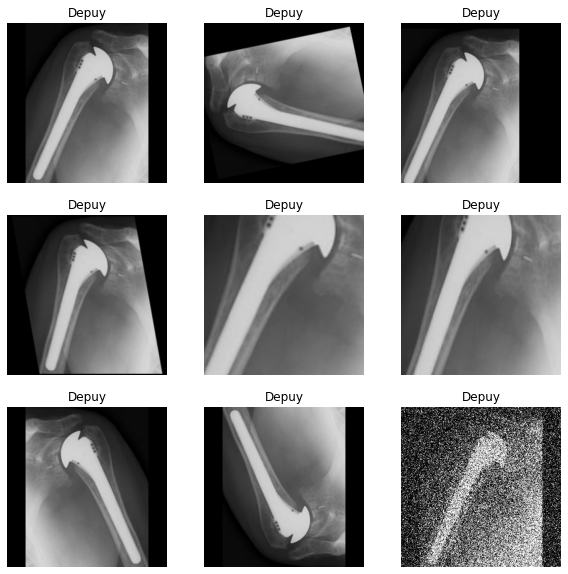

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(27,36):
  ax = plt.subplot(3, 3, i%9 + 1)
  plt.imshow(images[i])
  plt.title(name_map[int(labels[i])])
  plt.axis("off")

In [ ]:
# save file
np.save(path_var_new + 'images_augmented.npy', images)
np.save(path_var_new + 'labels_augmented.npy', labels)

### Alternative Way of Augmentation (reduce half of the size of original aug.)

In [ ]:
path_var = '/content/drive/MyDrive/data/'
path_var_new = '/content/drive/MyDrive/project_data/'
train_aug = np.load(path_var_new + 'train_file_aug.npy')

In [ ]:
#path_var = '/content/drive/MyDrive/data/'
number_images = len(train_aug)

# lets try to load in our data 
images = np.ndarray(shape = (number_images*5, 256,256,3), dtype = np.float32)
labels = np.ndarray(shape = (number_images*5))
# lets store the names of the images as well 
image_names = []

# Image Augmentation
# Apply a rotation on each image.
rotate = im_aug.Affine(rotate=(0, 360)) # 360 degree rotation

scaling = im_aug.Affine(scale=(1.05,2)) # zoom all image(direction) on both x and y axis

cropping = im_aug.size.Crop(percent=(0.10, 0.20)) # crop image randomly for 10% to 25%

flip_lr = im_aug.Fliplr(p=1.0) # flip image horizontally with probability = 1



i = 0;
# Looping through all files in folder
for file in os.listdir(path_var):
  if file in train_aug: # same strategy as previous section
    label = 0
    if file.split('.')[0] == 'Cofield':
      label = 0
    elif file.split('.')[0] == 'Depuy':
      label = 1
    elif file.split('.')[0] == 'Tornier':
      label = 2
    elif file.split('.')[0] == 'Zimmer':
      label = 3
    #read in the image
    pic = plt.imread(path_var + file, format='jpg')
    #resize the image to the standard dimension
    pic = resize(pic,(256,256,3)).astype(np.float32)

    images[i] = pic # original image
    labels[i] = label
    image_names.append(file)
    i += 1

    rotate_im = rotate.augment_image(pic)
    images[i] = rotate_im
    labels[i] = label
    i += 1

    scaling_im = scaling.augment_image(pic)
    images[i] = scaling_im
    labels[i] = label
    i += 1

    cropping_im = cropping.augment_image(pic)
    images[i] = cropping_im
    labels[i] = label
    i += 1

    flip_lr_im = flip_lr.augment_image(pic)
    images[i] = flip_lr_im
    labels[i] = label
    i += 1

  else:
    continue

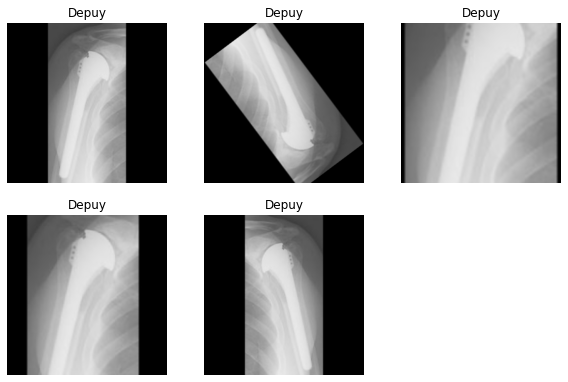

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0,5):
  ax = plt.subplot(3, 3, i%5 + 1)
  plt.imshow(images[i])
  plt.title(name_map[int(labels[i])])
  plt.axis("off")

In [ ]:
print(images.shape, labels.shape) # now there are only around 2000 images

(2235, 256, 256, 3) (2235,)


In [ ]:
# save file
np.save(path_var_new + 'images_augmented_half.npy', images)
np.save(path_var_new + 'labels_augmented_half.npy', labels)